# __<center>Report Analyst PT Prospect Motor</center>__

### **Data Visualitation**
- [Klik disini (Tableau)](https://public.tableau.com/app/profile/ahmad.dani.rifai/viz/TSAClaim_17175983116520/TSA) 

### **List Of Content**

1. Business Problem Understanding
2. Data Loading
3. Data Cleaning
4. Data Analysis
5. Conclusion
6. Recommendation

# **1. Business Problem Understanding**

**Pemecahan Masalah**

Saya akan menyelesaikan masalah menggunakkan SMART framework:

* Specific: Mengetahui perfomance sales semua dealer dari 2021 - 2023
* Measurable: Memperbaiki kinerja dealer - dealer yang memiliki perfomance rendah
* Achievable: Memberikan rekomendasi strategi untuk meningkatkan penjualan yang realistis
* Relevant: Memberikan perhatian lebih pada dealer dengan penjualan yang paling signifikan atau yang berpotensi untuk ditingkatkan
* Time-bound: Penigkatan  penjualan 5-10% dalam 6 bulan ke depan

**Problem Statement**

Penjualan mobil di beberapa dealer mengalami fluktuasi yang signifikan antara tahun 2021 hingga 2023. Meskipun beberapa dealer seperti Honda Shenzen dan Honda Guangzhou mencatat peningkatan yang stabil, dealer lain seperti Honda Da Nang dan Honda Ratchaburi memiliki penjualan yang relatif rendah dan tidak menunjukkan perbaikan yang signifikan. Ketidakseimbangan ini mempengaruhi keseluruhan performa regional dan menghambat optimalisasi penjualan di pasar tertentu.

**Problem Breakdown**

1. Mengapa beberapa dealer tumbuh pesat sementara yang lain tidak?
2. Mengapa beberapa wilayah menunjukkan kinerja lebih baik dari yang lain?
3. Type mana yang paling membutuhkan intervensi?
4. Bagaimana caranya meningkatkan penjualan di dealer yang kurang performa di tahun 2024?
5. Bagaimana memastikan analisa menggunakan uji statistik infretial dan descriptive?

# **2. Data Loading**

In [1]:
# Melakukan import module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Uji Statistik
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [2]:
# Menampilkan dataset 
df = pd.read_csv('Data_Jumat.csv')
display(df.head(),df.tail())

,NAMA DEALER,MODEL,TYPE,REGION,BULAN FAKTUR,QTY
0,Honda Arizona,ACCORD,EX,Amerika,05/01/2023,1
1,Honda Arizona,CIVIC,HYBRID,Amerika,01/01/2021,4
2,Honda Arizona,CIVIC,HYBRID,Amerika,02/01/2021,6
3,Honda Arizona,CIVIC,HYBRID,Amerika,03/01/2021,5
4,Honda Arizona,CIVIC,HYBRID,Amerika,04/01/2021,2


,NAMA DEALER,MODEL,TYPE,REGION,BULAN FAKTUR,QTY
4265,Honda Wuyang,INSPIRE,SPORT,China,08/01/2023,8
4266,Honda Wuyang,INSPIRE,SPORT,China,09/01/2023,12
4267,Honda Wuyang,INSPIRE,SPORT,China,10/01/2023,6
4268,Honda Wuyang,INSPIRE,SPORT,China,11/01/2023,12
4269,Honda Wuyang,INSPIRE,SPORT,China,12/01/2023,11


In [3]:
# Melihat informasi kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4270 entries, 0 to 4269
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NAMA DEALER   4270 non-null   object
 1   MODEL         4270 non-null   object
 2   TYPE          4270 non-null   object
 3   REGION        4270 non-null   object
 4   BULAN FAKTUR  4270 non-null   object
 5   QTY           4270 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 200.3+ KB


-   Dataset terdiri dari 4270 baris dan 6 kolom.
-   Terdapat 1 bertype integer dan 5 lainnya bertipe object.
-   Ada beberapa fitur tipe datanya tidak sesuai untuk kebutuhan analisa yang nanti akan dirubah tipe datanya sesuai kebutuhan analisa nantinya
-   Tidak terdapat missing values.

In [4]:
# Mengecek data apakah ada missing value
df.isnull().sum()

NAMA DEALER     0
MODEL           0
TYPE            0
REGION          0
BULAN FAKTUR    0
QTY             0
dtype: int64

In [5]:
# Melihat persentase missing value
df.isna().sum()/df.shape[0]*100

NAMA DEALER     0.0
MODEL           0.0
TYPE            0.0
REGION          0.0
BULAN FAKTUR    0.0
QTY             0.0
dtype: float64

Dari data diatas tidak ditemukannya missing value yang dimana ini akan memudahkan kita melakukan analisis

In [6]:
# Melihat data unik di setiap kolom dalam dataset
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel_Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel_Desc

,Column Name,Number of Unique,Unique Sample
0,NAMA DEALER,15,"[Honda Arizona, Honda Bangkok, Honda Canada, Honda Chiang Mai, Honda Da Nang, Honda Guangzhou, Honda Imperial Valley, Honda Kingman, Honda Ratchaburi, Honda Santa Monica, Honda Shanghai, Honda Shenzen, Honda Toronto, Honda Tuy Hoa, Honda Wuyang]"
1,MODEL,14,"[ACCORD, CIVIC, CR-V, HR-V, PILOT, BR-V, CITY, CITY HB, CIVIC HB, ODYSSEY, WR-V, BREEZE, ELYSION, INSPIRE]"
2,TYPE,17,"[EX, HYBRID, LX, SI SEDAN, SPORT, TOURING, EL, E, S, RS, ES, E CVT, SV, G, L, ELITE, LUXURY]"
3,REGION,5,"[Amerika, Thailand, Amerika Utara, Vietnam, China]"
4,BULAN FAKTUR,36,"[05/01/2023, 01/01/2021, 02/01/2021, 03/01/2021, 04/01/2021, 05/01/2021, 02/01/2022, 09/01/2023, 06/01/2021, 07/01/2021, 08/01/2021, 09/01/2021, 10/01/2021, 11/01/2021, 12/01/2021, 01/01/2022, 03/01/2022, 04/01/2022, 05/01/2022, 06/01/2022, 07/01/2022, 08/01/2022, 09/01/2022, 10/01/2022, 11/01/2022, 12/01/2022, 01/01/2023, 02/01/2023, 03/01/2023, 04/01/2023, 06/01/2023, 07/01/2023, 08/01/2023, 10/01/2023, 11/01/2023, 12/01/2023]"
5,QTY,209,"[1, 4, 6, 5, 2, 3, 24, 21, 14, 27, 31, 19, 17, 22, 15, 33, 18, 30, 37, 35, 38, 51, 36, 67, 68, 26, 70, 52, 55, 72, 41, 45, 63, 47, 92, 7, 10, 11, 16, 8, 61, 12, 44, 25, 29, 43, 34, 42, 9, 23, 13, 28, 20, 50, 40, 73, 59, 74, 139, 32, 97, 62, 82, 119, 106, 46, 58, 48, 113, 131, 158, 236, 143, 167, 133, 148, 93, 190, 145, 141, 195, 206, 214, 176, 247, 150, 260, 294, 163, 177, 191, 197, 149, 183, 115, 105, 99, 172, 49, 54, ...]"


In [7]:
# Melihat baris duplikat
duplicates_df = df[df.duplicated()]
print("Data duplikat:")
print(duplicates_df)

# Menghapus baris duplikat
dataset1 = df.drop_duplicates()
print("Dataset setelah menghapus duplikat:")
print(dataset1)

Data duplikat:
Empty DataFrame
Columns: [NAMA DEALER, MODEL, TYPE, REGION, BULAN FAKTUR, QTY]
Index: []
Dataset setelah menghapus duplikat:
        NAMA DEALER    MODEL    TYPE   REGION BULAN FAKTUR  QTY
0     Honda Arizona   ACCORD      EX  Amerika   05/01/2023    1
1     Honda Arizona    CIVIC  HYBRID  Amerika   01/01/2021    4
2     Honda Arizona    CIVIC  HYBRID  Amerika   02/01/2021    6
3     Honda Arizona    CIVIC  HYBRID  Amerika   03/01/2021    5
4     Honda Arizona    CIVIC  HYBRID  Amerika   04/01/2021    2
...             ...      ...     ...      ...          ...  ...
4265   Honda Wuyang  INSPIRE   SPORT    China   08/01/2023    8
4266   Honda Wuyang  INSPIRE   SPORT    China   09/01/2023   12
4267   Honda Wuyang  INSPIRE   SPORT    China   10/01/2023    6
4268   Honda Wuyang  INSPIRE   SPORT    China   11/01/2023   12
4269   Honda Wuyang  INSPIRE   SPORT    China   12/01/2023   11

[4270 rows x 6 columns]


Dari data diatas tidak ditemukkannya data duplikat ini akan memudahkan kita untuk melakukan proses selanjutnya

# **3. Data Cleaning**

**Melakukan perubahaan tipe data**

In [8]:
# Merubah tipe data object menjadi datetime
df['BULAN FAKTUR'] = pd.to_datetime(df['BULAN FAKTUR'], format='%d/%m/%Y')

In [9]:
# Mengecek kembali data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4270 entries, 0 to 4269
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NAMA DEALER   4270 non-null   object        
 1   MODEL         4270 non-null   object        
 2   TYPE          4270 non-null   object        
 3   REGION        4270 non-null   object        
 4   BULAN FAKTUR  4270 non-null   datetime64[ns]
 5   QTY           4270 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 200.3+ KB


In [14]:
# Simpan ke file terbaru untuk melakukan visualisasi di tablue
df.to_excel('visualization.xlsx', index=False)

# **4. Data Analysis**

**A. Distribusi Penjualan Berdasarkan Dealer**

In [10]:
# Mengelompokkan berdasarkan "NAMA DEALER" dan menjumlahkan "QTY"
dealer_sales = df.groupby('NAMA DEALER')['QTY'].sum().sort_values(ascending=False)

# Melihat 15 dealer dengan penjualan terbesar
top_dealers = dealer_sales.head(15)
print(top_dealers)

NAMA DEALER
Honda Bangkok            13165
Honda Shenzen            12966
Honda Toronto            11932
Honda Imperial Valley    11685
Honda Guangzhou          11164
Honda Canada             10359
Honda Shanghai            9966
Honda Santa Monica        9881
Honda Kingman             8497
Honda Chiang Mai          8229
Honda Arizona             4031
Honda Wuyang              2958
Honda Tuy Hoa             2746
Honda Ratchaburi          2316
Honda Da Nang              776
Name: QTY, dtype: int64


C:\Users\62811\AppData\Local\Temp\ipykernel_29212\2908635011.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dealers.values, y=top_dealers.index, palette='viridis')


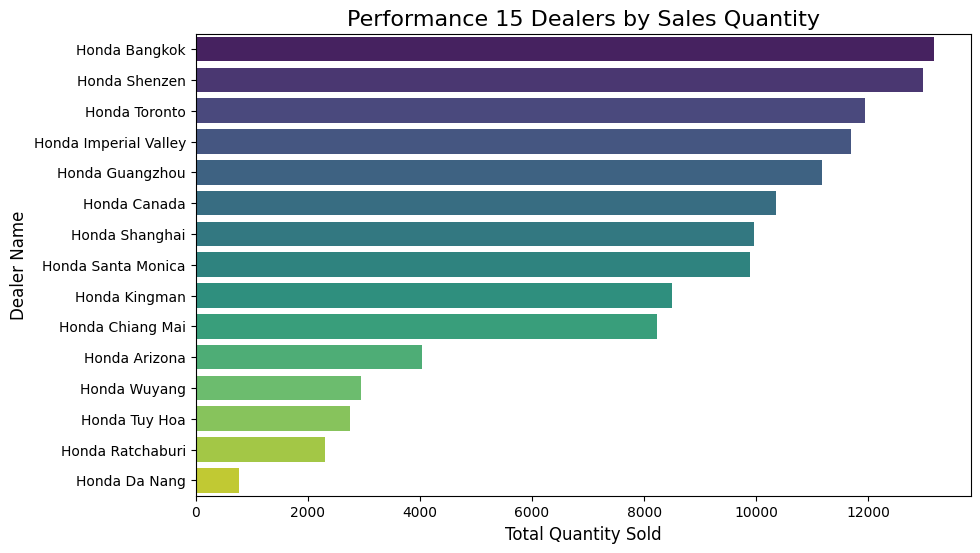

In [11]:
# Mengatur ukuran figure
plt.figure(figsize=(10,6))

# Menggunakan seaborn untuk membuat barplot dari top 10 dealer
sns.barplot(x=top_dealers.values, y=top_dealers.index, palette='viridis')

# Memberi judul dan label pada chart
plt.title('Performance 15 Dealers by Sales Quantity', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Dealer Name', fontsize=12)

# Menampilkan plot
plt.show()

### Kesimpulan:

1. Honda Bangkok memimpin dalam penjualan dengan jumlah terbanyak, diikuti oleh Honda Shenzen dan Honda Toronto.
2. Terdapat kesenjangan yang cukup besar antara dealer teratas (Bangkok, Shenzen, Toronto) dengan dealer di peringkat bawah (Da Nang, Ratchaburi).

### Rekomendasi:
1. Analisis praktik terbaik: Pelajari strategi penjualan dan operasional dari dealer top seperti Bangkok, Shenzen, dan Toronto. Terapkan praktik terbaik ini ke dealer lain untuk meningkatkan performa mereka.
2. Fokus pada peningkatan dealer berkinerja rendah: Berikan dukungan khusus dan sumber daya tambahan untuk dealer seperti Honda Da Nang dan Honda Ratchaburi untuk membantu mereka meningkatkan penjualan.
3. Evaluasi pasar lokal: Lakukan analisis mendalam tentang kondisi pasar di setiap lokasi dealer untuk memahami faktor-faktor yang mempengaruhi perbedaan performa penjualan.
4. Optimalisasi inventaris: Sesuaikan stok dan jenis kendaraan di setiap dealer berdasarkan preferensi pasar lokal dan tren penjualan.
5. Program pelatihan: Implementasikan program pelatihan komprehensif untuk staf penjualan di dealer dengan performa lebih rendah, fokus pada teknik penjualan dan pengetahuan produk.
6. Strategi pemasaran yang ditargetkan: Kembangkan kampanye pemasaran yang disesuaikan untuk masing-masing pasar, terutama di area dengan penjualan yang lebih rendah.
7. Insentif kinerja: Pertimbangkan untuk menerapkan sistem insentif berbasis kinerja untuk memotivasi dealer meningkatkan penjualan mereka.
8. Ekspansi strategis: Evaluasi potensi untuk membuka dealer baru di lokasi strategis berdasarkan kinerja dealer yang ada dan analisis pasar.
9. Kolaborasi antar dealer: Dorong pertukaran pengetahuan dan best practices antar dealer, terutama antara yang berkinerja tinggi dan rendah.
10. Pemantauan dan evaluasi berkala: Terapkan sistem pemantauan kinerja yang ketat dan lakukan evaluasi rutin untuk memastikan perbaikan berkelanjutan di semua dealer.

**B. Distribusi Penjualan Berdasarkan Model dan Tipe**

In [12]:
# Mengelompokkan berdasarkan MODEL dan menjumlahkan QTY
model_sales = df.groupby('MODEL')['QTY'].sum().sort_values(ascending=False)

# Melihat model dengan penjualan tertinggi
print("Top 10 Models by Sales:")
print(model_sales.head(10))

# Mengelompokkan berdasarkan TYPE dan menjumlahkan QTY
type_sales = df.groupby('TYPE')['QTY'].sum().sort_values(ascending=False)

# Melihat tipe dengan penjualan tertinggi
print("\nTop 10 Types by Sales:")
print(type_sales.head(10))

Top 10 Models by Sales:
MODEL
CIVIC      31790
BREEZE     26673
CR-V       21891
HR-V       15452
ELYSION     7360
PILOT       6595
BR-V        4874
INSPIRE     3021
WR-V        1685
CITY HB      864
Name: QTY, dtype: int64

Top 10 Types by Sales:
TYPE
SPORT       27671
HYBRID      27438
LX          26803
ES          10740
EL           5944
TOURING      4237
SI SEDAN     3120
EX           3009
E            2972
RS           2532
Name: QTY, dtype: int64


**B.1 Visualisasi Performance Models by Sales**

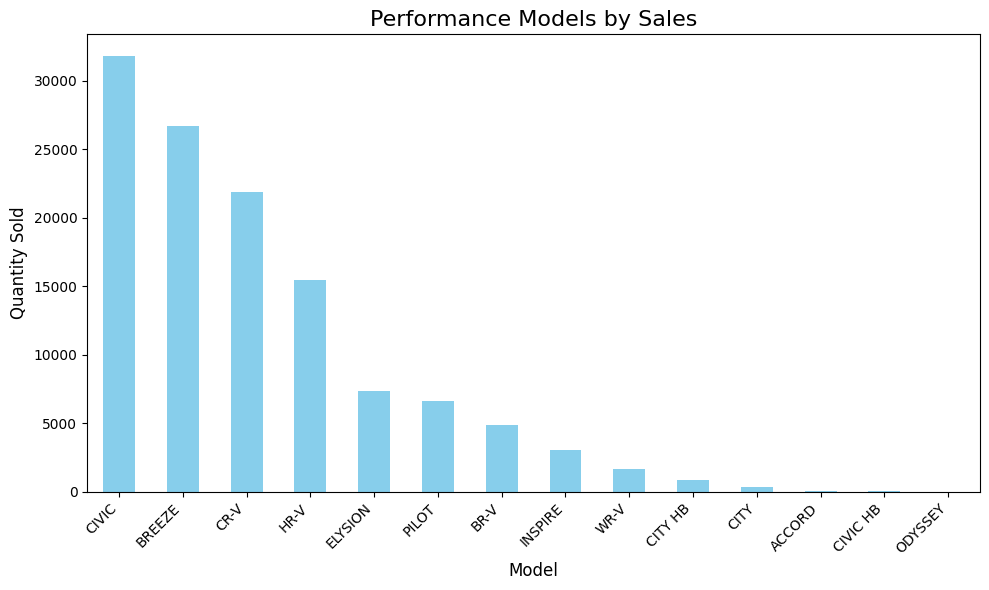

In [13]:
# Visualisasi semua model penjualan 
top_10_models = model_sales.head(14)

plt.figure(figsize=(10,6))
top_10_models.plot(kind='bar', color='skyblue')
plt.title('Performance Models by Sales', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Kesimpulan:

1. Model CIVIC adalah yang terlaris dengan penjualan jauh melebihi model-model lainnya.
2. Lima model teratas (CIVIC, BREEZE, CR-V, HR-V, dan ELYSION) mendominasi penjualan.
3. Beberapa model seperti CITY, ACCORD, CIVIC HB, dan ODYSSEY memiliki penjualan yang sangat rendah dibandingkan model-model lainnya.

### Rekomendasi:
1. Fokus pada peningkatan produksi dan pemasaran model CIVIC, mengingat popularitasnya yang tinggi.
2. Lakukan analisis mendalam mengapa BREEZE dan CR-V berhasil, dan terapkan strategi serupa pada model lain.
3. Evaluasi kembali strategi pemasaran dan positioning untuk model-model dengan penjualan rendah seperti CITY, ACCORD, CIVIC HB, dan ODYSSEY.
4. Pertimbangkan untuk menghentikan atau merevisi model-model dengan penjualan sangat rendah jika tidak ada potensi pertumbuhan yang signifikan.
5. Lakukan riset pasar untuk memahami preferensi konsumen dan sesuaikan lini produk berdasarkan temuan tersebut.
6. Optimalkan rantai pasokan dan inventori untuk model-model terlaris guna memastikan ketersediaan yang konsisten.
7. Kembangkan strategi bundling atau promosi khusus untuk mendorong penjualan model-model yang kurang laris.
8. Investasikan dalam inovasi dan pengembangan fitur baru untuk model-model terlaris guna mempertahankan daya tarik mereka di pasar.

**B.2 Visualisasi Performance Types by Sales**

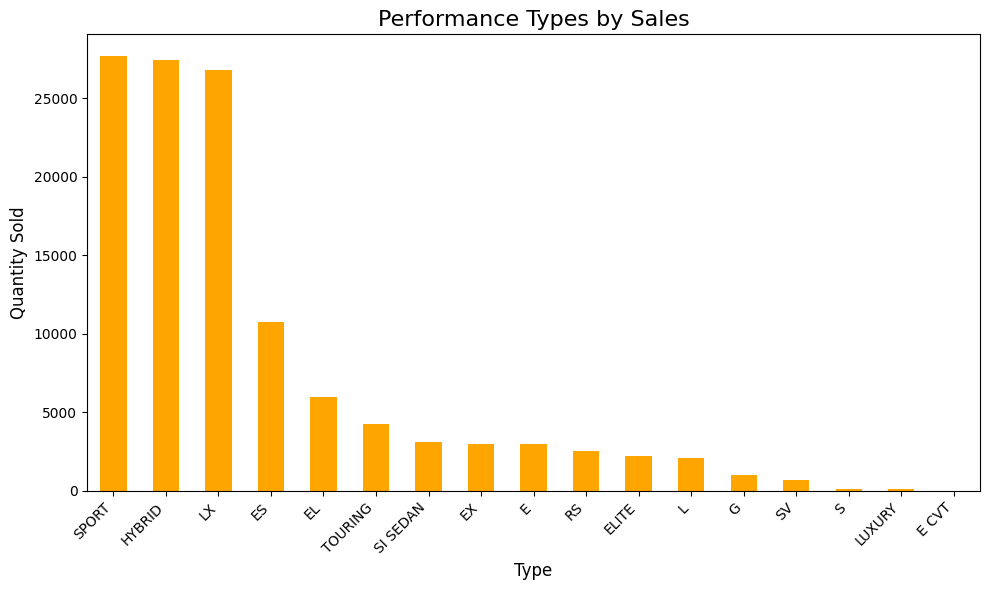

In [14]:
# Visualisasi 10 tipe dengan penjualan tertinggi
top_10_types = type_sales.head(17)

plt.figure(figsize=(10,6))
top_10_types.plot(kind='bar', color='orange')
plt.title('Performance Types by Sales', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Kesimpulan:

1. Tipe SPORT, HYBRID, dan LX adalah tiga tipe kendaraan terlaris dengan penjualan jauh melebihi tipe-tipe lainnya
2. Tipe-tipe seperti G, SV, S, LUXURY, dan E CVT memiliki penjualan yang sangat rendah dibandingkan tipe-tipe lainnya.

### Rekomendasi:

1. Fokuskan sumber daya pada pengembangan dan pemasaran tipe SPORT, HYBRID, dan LX, mengingat popularitasnya yang tinggi.
2. Lakukan analisis mendalam untuk memahami faktor-faktor yang membuat SPORT, HYBRID, dan LX sangat diminati, dan terapkan pembelajaran ini pada tipe-tipe lain.
3. Evaluasi kembali strategi pemasaran dan positioning untuk tipe-tipe dengan penjualan rendah seperti G, SV, S, LUXURY, dan E CVT.
4. Pertimbangkan untuk menghentikan atau merevisi tipe-tipe dengan penjualan sangat rendah jika tidak ada potensi pertumbuhan yang signifikan.
5. Lakukan riset pasar untuk memahami preferensi konsumen terkait tipe kendaraan dan sesuaikan lini produk berdasarkan temuan tersebut.
6. Optimalkan rantai pasokan dan inventori untuk tipe-tipe terlaris guna memastikan ketersediaan yang konsisten.
7. Kembangkan strategi bundling atau promosi khusus untuk mendorong penjualan tipe-tipe yang kurang laris, terutama yang memiliki potensi pertumbuhan.
8. Investasikan dalam inovasi teknologi dan fitur untuk tipe HYBRID, mengingat tren kendaraan ramah lingkungan yang semakin meningkat.
9. Pertimbangkan untuk menggabungkan beberapa tipe yang mirip namun memiliki penjualan rendah untuk mengoptimalkan lini produk.
10. Lakukan analisis harga dan nilai yang ditawarkan untuk setiap tipe, terutama untuk tipe-tipe premium seperti LUXURY, untuk memastikan proposisi nilai yang menarik bagi konsumen.

**C. Distribusi Berdasarkan Region**

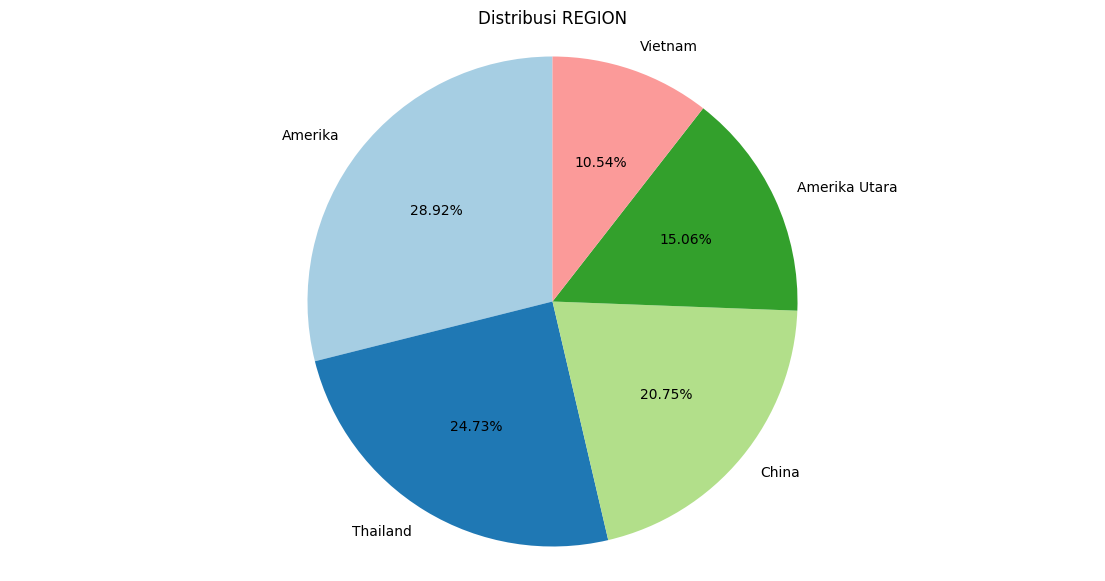

In [38]:
# Menghitung frekuensi masing-masing REGION
region_counts = df['REGION'].value_counts()

# Mendapatkan labels dan sizes untuk pie chart
labels = region_counts.index
sizes = region_counts.values

# Warna untuk pie chart
colors = plt.cm.Paired(range(len(labels))) 

# Membuat pie chart
plt.figure(figsize=(14, 7))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Distribusi REGION')
plt.axis('equal')
plt.show()

### Kesimpulan:

1. Amerika memiliki kontribusi penjualan terbesar, yaitu 28.92%.
2. Vietnam memiliki persentase kontribusi penjualan terkecil, yaitu 10.54%.

### Rekomendasi:

1. Fokus Peningkatan di Vietnam: Dengan kontribusi yang paling rendah, perusahaan bisa mempertimbangkan untuk meningkatkan strategi pemasaran di Vietnam, misalnya dengan kampanye promosi yang lebih kuat atau perluasan jaringan distribusi.
2. Pertahankan Strategi di Amerika: Karena Amerika memiliki pangsa terbesar, perlu dipertahankan dan diperkuat untuk tetap mendominasi.
3. Eksplorasi Potensi di Thailand dan China: Kedua negara ini memiliki kontribusi yang cukup signifikan. Fokus pada peluang pertumbuhan lebih lanjut, seperti peningkatan layanan pelanggan atau inovasi produk untuk mempertahankan dan memperluas pasar.

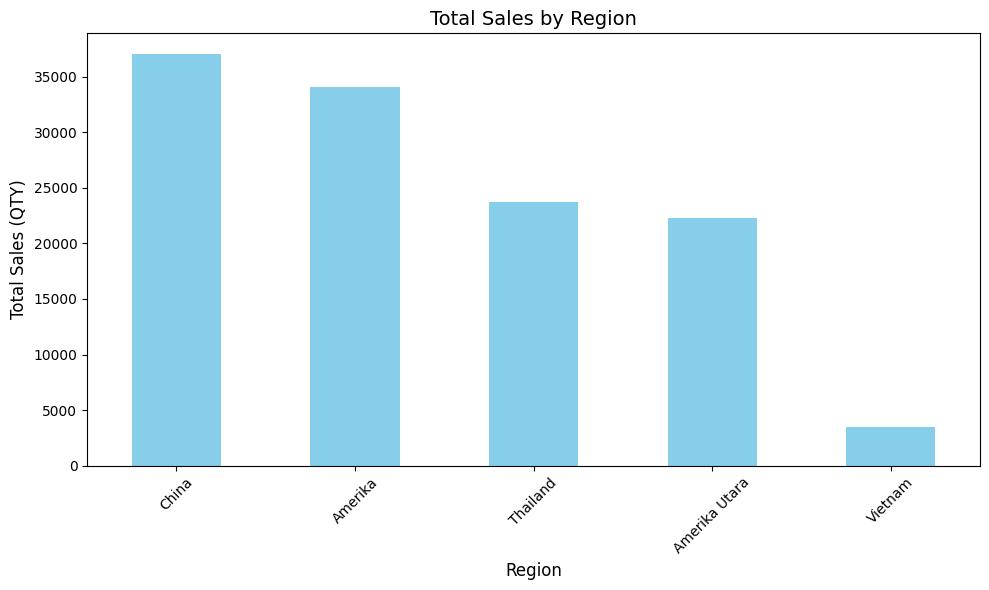

In [37]:
# Mengelompokkan berdasarkan REGION dan menjumlahkan QTY
region_sales = df.groupby('REGION')['QTY'].sum().sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(10,6))  
region_sales.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label
plt.title('Total Sales by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales (QTY)', fontsize=12)

# Menampilkan plot
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

### Kesimpulan:
1. China memiliki total penjualan tertinggi, mendekati 37.000 unit.
2. Amerika berada di urutan kedua dengan total penjualan sedikit di bawah China, sekitar 35.000 unit.
3. Vietnam memiliki total penjualan terendah, hanya sedikit di atas 5.000 unit.

### Rekomendasi:

1. **China - Fokus pada Produk Premium dan Layanan Purna Jual**:
   - **Mengapa**: China memiliki penjualan mobil tertinggi. Ini menunjukkan bahwa pasar mobil di China sangat besar dan kompetitif.
   - **Rekomendasi**: Perusahaan harus memaksimalkan peluang ini dengan menawarkan produk-produk premium untuk segmen pasar menengah ke atas. Selain itu, fokus pada **layanan purna jual (after-sales service)**, seperti pemeliharaan kendaraan dan layanan garansi, bisa menjadi faktor diferensiasi utama. **Program loyalitas** juga dapat membantu menjaga konsumen tetap terhubung.

2. **Amerika - Penetrasi Melalui Teknologi dan Kendaraan Listrik (EV)**:
   - **Mengapa**: Amerika juga merupakan pasar yang besar, mendekati penjualan di China. Pasar Amerika saat ini sedang bergeser ke arah **kendaraan listrik (EV)**.
   - **Rekomendasi**: Fokus pada kendaraan dengan teknologi ramah lingkungan seperti EV atau **kendaraan hybrid**. Perusahaan harus memperluas jaringan dealer mobil listrik dan berkolaborasi dengan pemasok stasiun pengisian baterai untuk memperluas infrastruktur EV. **Pemasaran digital yang menyasar segmen anak muda** yang sadar lingkungan bisa lebih diperkuat.

3. **Thailand - Dorong Penjualan dengan Program Pembiayaan dan Insentif**:
   - **Mengapa**: Thailand menunjukkan penjualan yang moderat. Ini menunjukkan bahwa ada potensi pertumbuhan, namun mungkin terbatas oleh daya beli.
   - **Rekomendasi**: Perusahaan bisa meningkatkan penjualan melalui **program pembiayaan yang terjangkau** seperti kredit mobil dengan bunga rendah atau **program trade-in** untuk mendorong konsumen mengganti kendaraan lama mereka. **Kemitraan dengan bank lokal** untuk menyediakan paket pembiayaan mobil bisa membantu mendorong pasar lebih cepat.

4. **Amerika Utara - Diversifikasi Produk ke Kendaraan Kecil dan Efisien**:
   - **Mengapa**: Amerika Utara memiliki penjualan yang sedikit lebih rendah dibandingkan Thailand. Konsumen di wilayah ini mungkin lebih memilih kendaraan yang **efisien bahan bakar**.
   - **Rekomendasi**: Diversifikasi produk ke **kendaraan kecil, crossover, dan SUV kompak** yang lebih hemat bahan bakar akan menarik minat konsumen. Selain itu, memperluas opsi **leasing** dengan penawaran menarik seperti biaya perawatan gratis dalam periode leasing dapat menarik segmen pasar yang lebih muda.

5. **Vietnam - Edukasi Pasar dan Pengembangan Infrastruktur Dealer**:
   - **Mengapa**: Penjualan di Vietnam sangat rendah dibandingkan negara lain, mungkin karena keterbatasan infrastruktur atau daya beli yang lebih rendah.
   - **Rekomendasi**: Fokus jangka pendek bisa dilakukan dengan **kampanye edukasi pasar** terkait kepemilikan kendaraan pribadi dan keuntungan jangka panjangnya. Selain itu, meningkatkan **aksesibilitas dengan membuka lebih banyak dealer** di wilayah yang berpotensi tinggi juga diperlukan. Insentif seperti **diskon harga dan bonus fitur** dapat menarik minat konsumen di segmen entry-level.

### Tindakan Taktis:
1. **Analisis Data Pembelian Konsumen**: Lakukan analisis mendalam terhadap data pelanggan di setiap negara untuk memahami preferensi mobil berdasarkan **harga, ukuran, dan fitur**.
2. **Optimalisasi Jaringan Dealer dan Layanan Purna Jual**: Memperkuat infrastruktur dealer serta layanan purna jual di negara-negara dengan penjualan rendah seperti Vietnam dan Thailand untuk memperluas pangsa pasar.
3. **Kampanye Pemasaran yang Disesuaikan dengan Budaya Lokal**: Buat kampanye pemasaran yang lebih sesuai dengan preferensi budaya dan daya beli masing-masing negara, seperti promosi lokal, penggunaan influencer, atau pemasaran digital yang disesuaikan.

**D. Tren Penjualan Bulanan**

Monthly Sales Trend:
BULAN FAKTUR
2021-01    33105
2022-01    43588
2023-01    43978
Freq: M, Name: QTY, dtype: int64


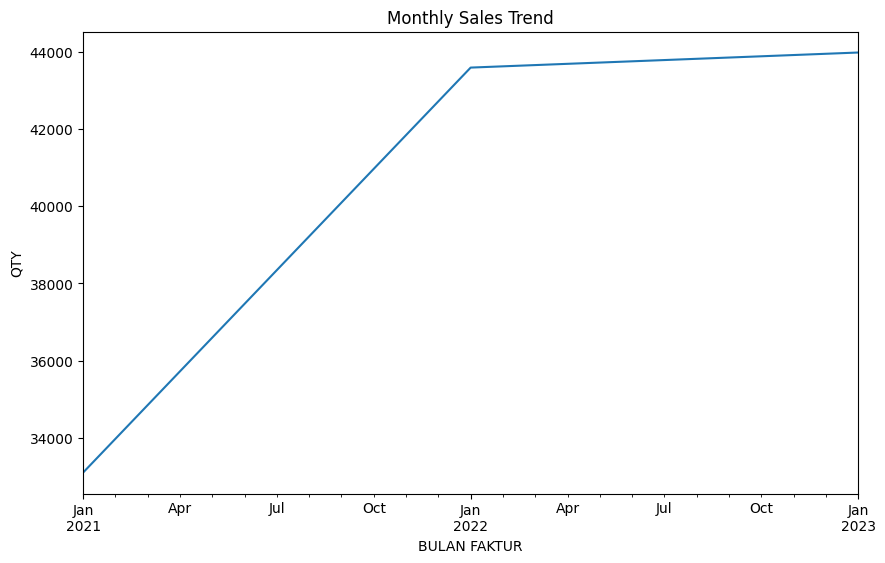

In [18]:
# Mengelompokkan penjualan berdasarkan bulan faktur
monthly_sales = df.groupby(df['BULAN FAKTUR'].dt.to_period('M'))['QTY'].sum()

# Menampilkan hasil
print("Monthly Sales Trend:")
print(monthly_sales)

monthly_sales.plot(kind='line', figsize=(10,6), title='Monthly Sales Trend', ylabel='QTY')
plt.show()

### Kesimpulan:
1. **Peningkatan Penjualan yang Stabil**: Grafik menunjukkan adanya peningkatan penjualan yang cukup stabil dari Januari 2021 hingga Januari 2023, dengan jumlah unit yang terjual naik dari sekitar 34.000 menjadi 44.000 unit.
2. **Lonjakan pada Tahun Pertama**: Lonjakan penjualan terbesar terjadi antara Januari 2021 hingga awal 2022, yang mungkin disebabkan oleh strategi pemasaran agresif, peningkatan permintaan mobil, atau peluncuran model baru.
3. **Kenaikan Lebih Landai Setelahnya**: Dari awal 2022 hingga 2023, tren masih meningkat tetapi dengan laju yang lebih landai, menunjukkan pasar yang lebih stabil namun tetap tumbuh.

### Rekomendasi:

1. **Adanya Pemulihan Pasar Pasca Pandemi COVID-19**:
   - **Mengapa**: Di lapangan, lonjakan penjualan dari 2021 hingga 2022 mungkin disebabkan oleh pemulihan ekonomi pasca pandemi. Setelah penurunan aktivitas ekonomi pada 2020, banyak konsumen yang mulai kembali melakukan pembelian, termasuk pembelian mobil.
   - **Rekomendasi**: Manfaatkan momentum pemulihan ekonomi dengan **peluncuran produk baru atau promo paket kendaraan** yang menarik. Ini akan mendorong konsumen yang masih ragu untuk melakukan pembelian besar.

2. **Peningkatan Minat terhadap Kendaraan Pribadi**:
   - **Mengapa**: Tren ini juga dapat dikaitkan dengan meningkatnya preferensi konsumen untuk kendaraan pribadi dibanding transportasi umum, karena faktor keamanan dan kesehatan pasca pandemi.
   - **Rekomendasi**: **Perkuat strategi pemasaran digital** yang menekankan keamanan dan kenyamanan mobil pribadi. Posisikan kendaraan sebagai solusi ideal di tengah kesadaran akan kebersihan dan keselamatan.

3. **Ketersediaan Program Pembiayaan dan Insentif Pajak**:
   - **Mengapa**: Peningkatan penjualan juga bisa dikaitkan dengan kebijakan pemerintah seperti insentif pajak kendaraan atau program pembiayaan kredit dengan suku bunga rendah yang banyak diberikan pada tahun 2021-2022 untuk mendorong penjualan di industri otomotif.
   - **Rekomendasi**: Bekerja sama dengan lembaga keuangan atau bank lokal untuk memperkenalkan **program pembiayaan kendaraan dengan bunga rendah** atau **program cicilan tanpa uang muka**. Tawarkan insentif tambahan seperti **gratis servis selama satu tahun** untuk mendorong pembelian.

4. **Peluncuran Model atau Teknologi Baru**:
   - **Mengapa**: Lonjakan penjualan pada awal 2022 juga bisa jadi didorong oleh peluncuran **model baru** atau adopsi teknologi yang menarik perhatian pasar, seperti kendaraan listrik atau hybrid.
   - **Rekomendasi**: **Lakukan inovasi produk** yang sejalan dengan tren terkini, misalnya mobil ramah lingkungan (EV), atau **mobil dengan fitur keselamatan canggih**. Jika memungkinkan, perluas lini produk dengan variasi model kendaraan yang dapat menjangkau segmen pasar yang lebih luas.

5. **Pertumbuhan Ekonomi yang Stabil**:
   - **Mengapa**: Pertumbuhan ekonomi yang stabil di negara-negara target pasar kemungkinan besar juga mendorong daya beli konsumen.
   - **Rekomendasi**: Gunakan data ekonomi makro untuk **memperkirakan tren permintaan di masa mendatang** dan mengoptimalkan persediaan di wilayah dengan pertumbuhan ekonomi tinggi. Selain itu, **monitor kebijakan fiskal dan suku bunga** untuk merespons perubahan kondisi pasar dengan cepat.

6. **Optimalkan Jaringan Dealer dan Pemasaran**:
   - **Mengapa**: Penjualan yang meningkat juga bisa terkait dengan perluasan jaringan dealer dan strategi pemasaran yang lebih efektif.
   - **Rekomendasi**: Perkuat **distribusi dan layanan pelanggan**, termasuk **peningkatan jaringan dealer** di wilayah dengan permintaan tinggi. Gunakan strategi pemasaran berbasis data untuk menjangkau lebih banyak calon konsumen melalui kampanye media sosial dan iklan bertarget.

### Tindakan Lanjutan:
- **Riset Pasar Mendalam**: Lakukan survei konsumen untuk memahami faktor pendorong utama pembelian, seperti preferensi kendaraan, fitur yang paling diinginkan, dan alasan utama mereka memilih kendaraan pribadi.
- **Penguatan Layanan Purna Jual**: Berikan fokus lebih pada **layanan purna jual yang andal** dan fleksibilitas program pemeliharaan untuk meningkatkan loyalitas konsumen.

Dengan mengamati pola peningkatan yang stabil, strategi yang fokus pada pemulihan ekonomi, inovasi produk, dan program pembiayaan akan membantu menjaga momentum penjualan yang positif di masa depan.

**E. Rata-Rata Penjualan per Dealer Setip Tahunnyaa**

In [43]:
# Pastikan 'BULAN FAKTUR' adalah tipe datetime
df['BULAN FAKTUR'] = pd.to_datetime(df['BULAN FAKTUR'])

# Membuat kolom tahun dari 'BULAN FAKTUR'
df['TAHUN'] = df['BULAN FAKTUR'].dt.year

# Menghitung rata-rata penjualan per dealer per tahun
avg_sales_per_dealer_year = df.groupby(['NAMA DEALER', 'TAHUN'])['QTY'].mean().unstack().fillna(0)

# Menampilkan hasil
print("Average Sales per Dealer per Year:")
print(avg_sales_per_dealer_year)

# Mencari dealer dengan rata-rata penjualan tertinggi untuk setiap tahun
top_dealers_per_year = avg_sales_per_dealer_year.idxmax()

# Menampilkan dealer dengan rata-rata penjualan tertinggi untuk setiap tahun
print("\nDealer dengan Rata-rata Penjualan Tertinggi per Tahun:")
for year in top_dealers_per_year.index:
    dealer = top_dealers_per_year[year]
    avg_sales = avg_sales_per_dealer_year.at[dealer, year]
    print(f"Tahun {year}: Dealer {dealer} dengan rata-rata penjualan {avg_sales:.2f}")

Average Sales per Dealer per Year:
TAHUN                       2021       2022       2023
NAMA DEALER                                           
Honda Arizona          15.276923  14.000000  14.777778
Honda Bangkok          36.638889  33.712329  29.972028
Honda Canada           35.375000  33.254545  30.242188
Honda Chiang Mai       22.638889  22.393939  20.642336
Honda Da Nang           3.164384   3.607143   6.017544
Honda Guangzhou        34.487500  51.013889  65.722222
Honda Imperial Valley  37.265823  36.686441  34.468750
Honda Kingman          35.657895  28.947368  19.896000
Honda Ratchaburi        7.415584   8.186275   8.834951
Honda Santa Monica     35.820513  33.294118  25.614754
Honda Shanghai         35.768293  51.585714  47.527778
Honda Shenzen          42.076923  65.972222  68.527778
Honda Toronto          37.158537  34.666667  38.240310
Honda Tuy Hoa           8.727273  11.697674  11.088608
Honda Wuyang            9.675325  14.776119  16.986111

Dealer dengan Rata-rata Penju

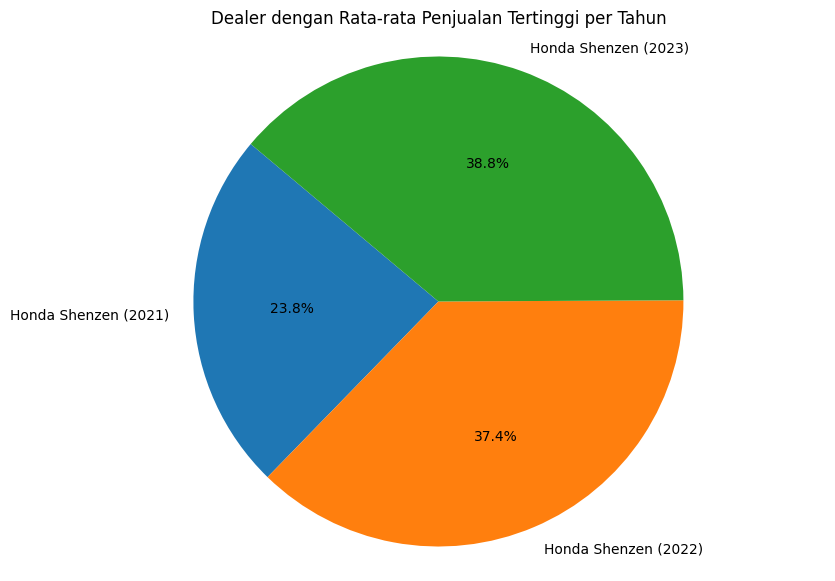

In [44]:
# Membuat kolom tahun dari 'BULAN FAKTUR'
df['TAHUN'] = df['BULAN FAKTUR'].dt.year

# Menghitung rata-rata penjualan per dealer per tahun
avg_sales_per_dealer_year = df.groupby(['NAMA DEALER', 'TAHUN'])['QTY'].mean().unstack().fillna(0)

# Mencari dealer dengan rata-rata penjualan tertinggi untuk setiap tahun
top_dealers_per_year = avg_sales_per_dealer_year.idxmax()

# Mengambil data untuk visualisasi
dealer_names = []
avg_sales_values = []
for year in top_dealers_per_year.index:
    dealer = top_dealers_per_year[year]
    avg_sales = avg_sales_per_dealer_year.at[dealer, year]
    dealer_names.append(f"{dealer} ({year})")
    avg_sales_values.append(avg_sales)

# Pie Chart
plt.figure(figsize=(10, 7))
plt.pie(avg_sales_values, labels=dealer_names, autopct='%1.1f%%', startangle=140)
plt.title('Dealer dengan Rata-rata Penjualan Tertinggi per Tahun')
plt.axis('equal')
plt.show()

### Kesimpulan:
1. **Kinerja Konsisten:** Honda Shenzen menunjukkan performa penjualan yang konsisten dan meningkat dari tahun ke tahun, menjadikannya sebagai dealer teratas dalam hal rata-rata penjualan.
2. **Perbedaan dengan Dealer Lain:** Meskipun ada dealer lain seperti Honda Guangzhou dan Honda Imperial Valley yang juga menunjukkan performa baik, tidak ada yang dapat mengalahkan konsistensi dan pertumbuhan penjualan Honda Shenzen.

### Rekomendasi:

1. **Analisis Penyebab Kesuksesan:**
   - **Studi Kasus:** Melakukan studi kasus mendalam terhadap Honda Shenzen untuk memahami faktor-faktor yang berkontribusi pada kesuksesan mereka. Ini bisa meliputi strategi pemasaran, kualitas layanan, lokasi, atau faktor lain yang memengaruhi penjualan.
   - **Benchmarking:** Mengidentifikasi praktik terbaik dan strategi yang diterapkan di Honda Shenzen yang mungkin dapat diterapkan di dealer lain untuk meningkatkan penjualan mereka.

2. **Penyesuaian Strategi untuk Dealer Lain:**
   - **Adaptasi Strategi:** Mengadaptasi beberapa strategi sukses dari Honda Shenzen ke dealer lain, seperti meningkatkan kualitas layanan pelanggan, memperbaiki strategi pemasaran, atau menawarkan promosi khusus.
   - **Pelatihan dan Pengembangan:** Memberikan pelatihan tambahan kepada staf di dealer lain untuk meningkatkan keterampilan penjualan dan pelayanan pelanggan.

3. **Fokus pada Peningkatan Produk dan Layanan:**
   - **Inovasi Produk:** Menilai apakah ada aspek dari produk atau layanan yang dapat dioptimalkan untuk meningkatkan daya tarik di pasar.
   - **Layanan Pelanggan:** Memperbaiki pengalaman pelanggan untuk meningkatkan kepuasan dan loyalitas, yang dapat berdampak positif pada penjualan.

4. **Pengelolaan Sumber Daya dan Infrastruktur:**
   - **Alokasi Sumber Daya:** Menyusun ulang alokasi sumber daya untuk memaksimalkan potensi dealer dengan performa rendah.
   - **Investasi Infrastruktur:** Menilai apakah investasi tambahan dalam infrastruktur atau fasilitas dapat meningkatkan penjualan di dealer yang performanya kurang baik.

**F. Korelasi antara Model dan Region**

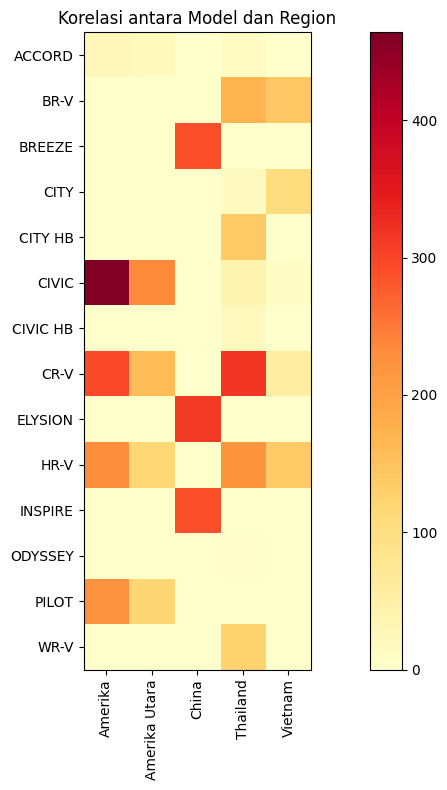

In [32]:
# Melakukan uji kolerasi antara model dan region
def plot_model_region_correlation(df):
    model_region = pd.crosstab(df['MODEL'], df['REGION'])
    plt.figure(figsize=(12, 8))
    plt.imshow(model_region, cmap='YlOrRd')
    plt.colorbar()
    plt.xticks(range(len(model_region.columns)), model_region.columns, rotation=90)
    plt.yticks(range(len(model_region.index)), model_region.index)
    plt.title('Korelasi antara Model dan Region')
    plt.tight_layout()
    plt.show()

# Jalankan fungsi
plot_model_region_correlation(df)

### Kesimpulan:

1. Model dengan Penjualan Tertinggi di Wilayah Tertentu:

    * CIVIC tampaknya sangat populer di Amerika, ditunjukkan oleh warna paling gelap di wilayah tersebut.

    * BR-V dan CR-V menunjukkan performa penjualan yang cukup kuat di Thailand dan China, dengan warna yang lebih gelap.

    * HR-V dan ELYSON memiliki kinerja baik di beberapa wilayah, seperti Thailand dan Amerika Utara.

2. Model dengan Penjualan Lebih Rendah di Wilayah Tertentu:

    * Model seperti ACCORD dan INSPIRE menunjukkan korelasi yang rendah dengan hampir semua wilayah, yang mungkin mengindikasikan popularitas yang lebih rendah atau kurangnya fokus pemasaran di wilayah-wilayah tersebut.

    * Beberapa model seperti CITY HB memiliki preferensi yang cukup terpusat di satu atau dua wilayah saja.

### Rekomendasi:

1. Segmentasi Pasar Lebih Spesifik:

Peningkatan fokus di Amerika: Dengan melihat tingginya popularitas CIVIC di Amerika, perusahaan dapat mengalokasikan lebih banyak upaya pemasaran dan promosi pada model ini untuk memaksimalkan penetrasi pasar.

Penguatan Pasar di China dan Thailand: BR-V dan CR-V tampaknya memiliki daya tarik yang kuat di wilayah-wilayah tersebut. Ini bisa menjadi peluang bagi perusahaan untuk memperdalam kehadiran model-model ini di pasar tersebut dengan memperluas jaringan distribusi atau menawarkan insentif khusus.

2. Evaluasi Produk yang Kurang Populer:

Model ACCORD dan INSPIRE: Model ini tampaknya tidak memiliki korelasi kuat dengan wilayah manapun. Perusahaan perlu mengevaluasi apakah penjualan ini disebabkan oleh kurangnya permintaan, strategi pemasaran yang kurang tepat, atau mungkin faktor-faktor seperti ketersediaan model di wilayah-wilayah tersebut. Apabila diperlukan, bisa dilakukan reposisi produk atau diversifikasi penawaran yang lebih relevan untuk pasar tersebut.

3. Kustomisasi Produk Berdasarkan Preferensi Regional:

Untuk model yang diminati di wilayah tertentu, perusahaan bisa fokus pada strategi lokalisasi produk, di mana model disesuaikan dengan kebutuhan dan preferensi konsumen di masing-masing wilayah. Misalnya, varian model yang dilengkapi dengan fitur khusus yang lebih sesuai dengan iklim, budaya, atau kebiasaan mengemudi di wilayah tersebut.

4. Pengembangan Wilayah Pasar Baru:

Melihat preferensi yang bervariasi di setiap wilayah, ada peluang untuk memperkenalkan model yang kurang populer di wilayah lain dengan strategi pemasaran baru. Misalnya, jika PILOT cukup sukses di Amerika Utara, model ini dapat dipromosikan lebih agresif di pasar Asia dengan menyesuaikan fitur yang relevan untuk konsumen lokal.

Kesimpulannya, perusahaan dapat menggunakan analisis ini untuk mengoptimalkan strategi distribusi dan pemasaran mereka berdasarkan preferensi regional untuk meningkatkan penjualan masing-masing model.

**G. Analisis Pareto untuk Dealer**

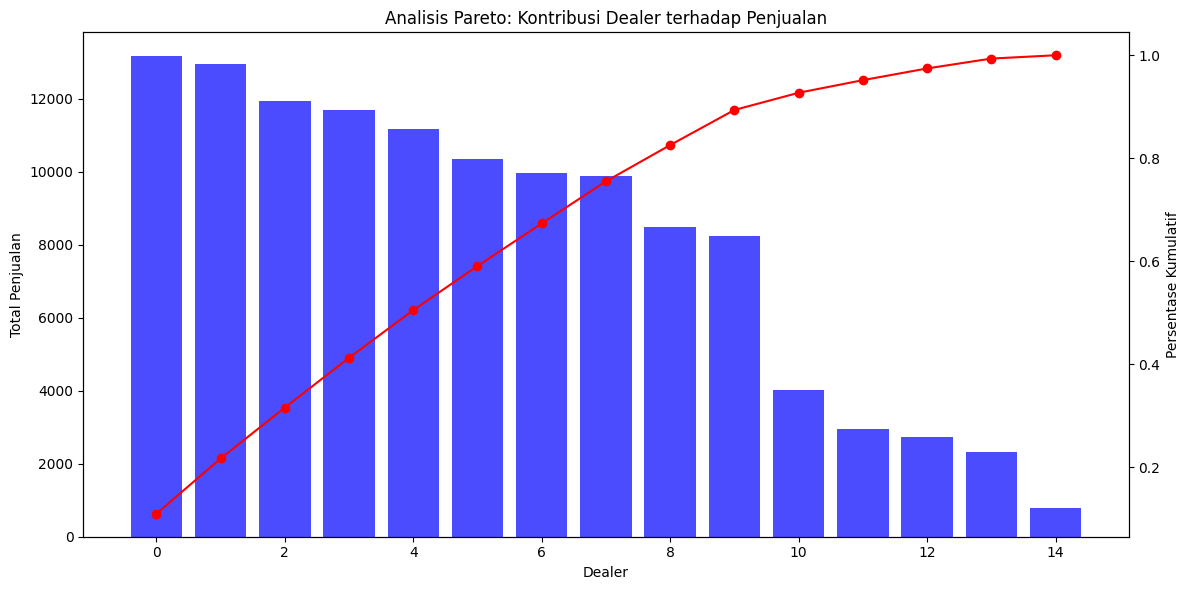

In [29]:
# Analisis Pareto untuk Dealer
def plot_pareto_dealer(df):
    try:
        dealer_sales = df.groupby('NAMA DEALER')['QTY'].sum().sort_values(ascending=False)
        cumulative_sales = dealer_sales.cumsum() / dealer_sales.sum()
        
        fig, ax1 = plt.subplots(figsize=(12, 6))
        ax2 = ax1.twinx()
        
        ax1.bar(range(len(dealer_sales)), dealer_sales.values, color='b', alpha=0.7)
        ax2.plot(range(len(cumulative_sales)), cumulative_sales.values, color='r', marker='o')
        
        ax1.set_xlabel('Dealer')
        ax1.set_ylabel('Total Penjualan')
        ax2.set_ylabel('Persentase Kumulatif')
        
        plt.title('Analisis Pareto: Kontribusi Dealer terhadap Penjualan')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error in plot_pareto_dealer: {e}")

plot_pareto_dealer(df)

### Kesimpulan:

1. Prinsip Pareto (80/20): Grafik ini mencerminkan prinsip Pareto, di mana sekitar 80% dari total penjualan dihasilkan oleh sekitar 20% dealer teratas. Dealer-dealer awal di grafik menyumbang sebagian besar penjualan.
2. Dealer dengan kontribusi rendah: Dealer di ujung grafik memiliki kontribusi yang jauh lebih kecil terhadap penjualan, yang terlihat dari penurunan drastis dalam jumlah penjualan pada dealer tersebut.



### Rekomendasi:

1. Fokus pada Dealer Berkinerja Tinggi: Dealer yang ada di bagian awal grafik yang memiliki kontribusi besar terhadap penjualan perlu mendapat perhatian lebih. Anda bisa menginvestasikan lebih banyak sumber daya pada mereka, misalnya memberikan pelatihan tambahan, promosi, atau insentif untuk mempertahankan atau bahkan meningkatkan kinerja mereka.
2. Evaluasi Dealer Berkinerja Rendah: Untuk dealer dengan kinerja rendah, diperlukan evaluasi yang mendalam. Beberapa faktor yang perlu dianalisis meliputi:

    * Aksesibilitas lokasi: Apakah dealer tersebut berada di daerah yang sulit dijangkau atau memiliki pasar yang terbatas?

    * Strategi pemasaran: Apakah dealer menggunakan strategi pemasaran yang efektif? Jika tidak, mungkin diperlukan pelatihan atau panduan untuk meningkatkan penjualan mereka.

    * Ketersediaan stok: Apakah dealer ini menghadapi masalah dengan ketersediaan produk atau logistik yang mempengaruhi kinerja penjualan mereka?
3. Diversifikasi Pasar: Jika dealer berkinerja rendah beroperasi di area dengan permintaan rendah, mungkin perlu dipertimbangkan untuk melakukan ekspansi atau diversifikasi ke pasar lain yang lebih potensial.
4. Optimasi Dukungan dan Sumber Daya: Periksa apakah dealer dengan penjualan rendah mendapatkan dukungan yang sama dalam hal materi promosi, pelatihan, atau akses ke produk unggulan. Jika ada ketimpangan, hal ini bisa menjadi penyebab perbedaan kinerja.

Dengan memperhatikan faktor-faktor ini, perusahaan dapat lebih efisien dalam mengalokasikan sumber daya dan strategi untuk meningkatkan penjualan di dealer dengan kontribusi rendah, sambil terus mendukung dealer yang berkinerja tinggi.

**H. Statistik Descriptive**

1. Analisis descriptive untuk Quantity (QTY)

In [46]:
# Misalkan df adalah DataFrame Anda
descriptive_stats = df['QTY'].describe()
print(descriptive_stats)

count    4270.000000
mean       28.260187
std        39.944797
min         1.000000
25%         5.000000
50%        14.000000
75%        35.000000
max       429.000000
Name: QTY, dtype: float64


2. Distribusi Penjualan per Region

In [47]:
# Mengelompokkan data berdasarkan region dan menghitung total penjualan
region_sales = df.groupby('REGION')['QTY'].sum()
print(region_sales)

REGION
Amerika          34094
Amerika Utara    22291
China            37054
Thailand         23710
Vietnam           3522
Name: QTY, dtype: int64


**I. Statistik Inferensial**

**Uji Chi-Square (Chi-Square Test of Independence)**

1. Apakah ada hubungan antara REGION dan Penjualan?

In [51]:
# Misalkan kita bagi penjualan menjadi 3 kategori
df['QTY_CATEGORY'] = pd.cut(df['QTY'], bins=[0, 10, 50, 100], labels=['Low', 'Medium', 'High'])

# Membuat tabel kontingensi antara REGION dan kategori penjualan
contingency_table = pd.crosstab(df['REGION'], df['QTY_CATEGORY'])

# Uji Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

# Interpretasi hasil
if p < 0.05:
    print("Ada hubungan signifikan antara REGION dan kategori penjualan.")
else:
    print("Tidak ada hubungan signifikan antara REGION dan kategori penjualan.")

Chi-Square Statistic: 355.56210591929215, p-value: 5.88198411653621e-72
Ada hubungan signifikan antara REGION dan kategori penjualan.


**Uji T-Test untuk Perbedaan Rata-Rata Penjualan Berdasarkan Tahun**    

2. Apakah ada perbedaan signifikan dalam rata-rata penjualan antara Tahun 2022 dan 2023?

In [52]:
# Filter data untuk tahun 2022 dan 2023
df['BULAN FAKTUR'] = pd.to_datetime(df['BULAN FAKTUR'])
df['YEAR'] = df['BULAN FAKTUR'].dt.year

sales_2022 = df[df['YEAR'] == 2022]['QTY']
sales_2023 = df[df['YEAR'] == 2023]['QTY']

# Uji T-Test
t_stat, p_value = ttest_ind(sales_2022, sales_2023, equal_var=False)

print(f"T-Statistic: {t_stat}, p-value: {p_value}")

# Interpretasi hasil
if p_value < 0.05:
    print("Ada perbedaan signifikan dalam rata-rata penjualan antara Tahun 2022 dan 2023.")
else:
    print("Tidak ada perbedaan signifikan dalam rata-rata penjualan antara Tahun 2022 dan 2023.")

T-Statistic: 0.647011412815522, p-value: 0.5176736639655762
Tidak ada perbedaan signifikan dalam rata-rata penjualan antara Tahun 2022 dan 2023.


# **5. Conclusion**

Untuk meningkatkan performa penjualan, perusahaan dapat mencontoh strategi sukses dari dealer top seperti Bangkok, Shenzen, dan Toronto. Fokus harus diberikan pada peningkatan dealer yang berkinerja rendah seperti Honda Da Nang dengan dukungan tambahan. Peluang pasar menengah ke atas dapat dimaksimalkan dengan menawarkan produk premium dan memperkuat layanan purna jual serta program loyalitas. Kampanye edukasi pasar dan membuka dealer di wilayah berpotensi tinggi juga diperlukan. Pada produk, fokuslah pada pengembangan tipe populer seperti SPORT, HYBRID, dan LX, serta dorong penjualan tipe yang kurang laris dengan promosi. Lonjakan penjualan 2021-2022 kemungkinan didorong oleh pemasaran agresif dan kebijakan pemerintah seperti insentif pajak dan pembiayaan kredit dengan bunga rendah.

# **6. Recomendation**

1. **Terapkan Praktik Terbaik dari Dealer Top**: Pelajari strategi penjualan dan operasional dari dealer seperti Bangkok, Shenzen, dan Toronto. Terapkan metode mereka di dealer lain melalui pelatihan staf, kampanye pemasaran, dan peningkatan operasional untuk mendongkrak kinerja dealer yang kurang berprestasi.

2. **Dukung Dealer dengan Kinerja Rendah**: Berikan dukungan khusus untuk dealer seperti Honda Da Nang melalui peningkatan pelatihan penjualan, alokasi sumber daya tambahan, dan program insentif khusus yang ditujukan untuk menarik pelanggan di wilayah dengan performa rendah.

3. **Fokus pada Produk Premium dan Layanan Purna Jual**: Maksimalkan peluang di segmen pasar menengah ke atas dengan memperkenalkan produk premium dan memperkuat layanan purna jual seperti pemeliharaan kendaraan dan garansi. Program loyalitas dapat digunakan untuk meningkatkan retensi pelanggan.

4. **Edukasi Pasar dan Buka Dealer di Wilayah Potensial**: Lakukan kampanye edukasi tentang manfaat kepemilikan kendaraan pribadi, terutama di wilayah-wilayah berkembang. Tambahkan dealer di wilayah dengan potensi pertumbuhan tinggi untuk menjangkau pasar baru, disertai dengan promosi diskon dan penawaran fitur untuk menarik segmen entry-level.

5. **Fokus pada Pengembangan Tipe Populer**: Alokasikan sumber daya untuk pengembangan dan pemasaran tipe kendaraan yang populer seperti SPORT, HYBRID, dan LX, karena tipe ini memiliki permintaan tinggi. Tingkatkan daya tarik tipe-tipe yang kurang laku dengan strategi bundling dan promosi khusus.

6. **Manfaatkan Kebijakan Pemerintah dan Insentif**: Gunakan insentif pajak dan program pembiayaan kredit dengan bunga rendah yang ditawarkan pemerintah untuk mendorong penjualan di dealer. Promosikan penawaran ini untuk menarik lebih banyak pelanggan di tengah tren kenaikan penjualan kendaraan.